## EDA And Feature Engineering Flight Price Prediction
Dataset: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

## About Dataset
### Introduction
The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

### Research Questions
The aim of our study is to answer the below research questions:
a) Does price vary with Airlines?
b) How is the price affected when tickets are bought in just 1 or 2 days before departure?
c) Does ticket price change based on the departure time and arrival time?
d) How the price changes with change in Source and Destination?
e) How does the ticket price vary between Economy and Business class?

### Data Collection and Methodology
Octoparse scraping tool was used to extract data from the website. Data was collected in two parts: one for economy class tickets and another for business class tickets. A total of 300261 distinct flight booking options was extracted from the site. Data was collected for 50 days, from February 11th to March 31st, 2022.
Data source was secondary data and was collected from Ease my trip website.

### Dataset
Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.



### FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_excel("data/flight_price.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df['Date']= df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [7]:
df['Date']= df['Date'].astype(int)
df['Month']= df['Month'].astype(int)
df['Year']= df['Year'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int64 
 12  Month            10683 non-null  int64 
 13  Year             10683 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


In [9]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [10]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [11]:
df['Departure_hour'] = df['Dep_Time'].str.split(':').str[0]
df['Departure_min'] = df['Dep_Time'].str.split(':').str[1]

In [12]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,05,50


In [13]:
df['Departure_hour'] = df['Departure_hour'].astype(int)
df['Departure_min'] = df['Departure_min'].astype(int) 

In [14]:
df.drop('Dep_Time', axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Departure_hour   10683 non-null  int64 
 13  Departure_min    10683 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.1+ MB


In [16]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [17]:
df['Arrival_hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min'] = df['Arrival_Time'].str.split(':').str[1]

In [18]:
df['Arrival_hour'] = df['Arrival_hour'].astype(int)
df['Arrival_min'] = df['Arrival_min'].astype(int) 

In [19]:
df.drop('Arrival_Time', axis = 1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int64 
 9   Month            10683 non-null  int64 
 10  Year             10683 non-null  int64 
 11  Departure_hour   10683 non-null  int64 
 12  Departure_min    10683 non-null  int64 
 13  Arrival_hour     10683 non-null  int64 
 14  Arrival_min      10683 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.2+ MB


In [21]:
df.drop('Route', axis = 1 , inplace = True)

In [22]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Departure_hour,Departure_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [23]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [24]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Departure_hour,Departure_min,Arrival_hour,Arrival_min
9039,Air India,Delhi,Cochin,23h 40m,NaN,No info,7480,6,5,2019,9,45,9,25


In [25]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [26]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Duration         10683 non-null  object
 4   Total_Stops      10683 non-null  int64 
 5   Additional_Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   Date             10683 non-null  int64 
 8   Month            10683 non-null  int64 
 9   Year             10683 non-null  int64 
 10  Departure_hour   10683 non-null  int64 
 11  Departure_min    10683 non-null  int64 
 12  Arrival_hour     10683 non-null  int64 
 13  Arrival_min      10683 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1.1+ MB


In [28]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [29]:
df.drop('Additional_Info', axis = 1, inplace=True)

In [30]:
df['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10683, dtype: object

In [31]:
df['Duration_hour'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_min'] = df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [32]:
# Remove non-numeric entries or replace them with NaN
df['Duration_hour'] = pd.to_numeric(df['Duration_hour'], errors='coerce')

# Fill NaN values (if needed, replace them with a default value or drop them)
df['Duration_hour'] = df['Duration_hour'].fillna(00).astype(int)

In [33]:
# Remove non-numeric entries or replace them with NaN
df['Duration_min'] = pd.to_numeric(df['Duration_min'], errors='coerce')

# Fill NaN values (if needed, replace them with a default value or drop them)
df['Duration_min'] = df['Duration_min'].fillna(00).astype(int)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Duration        10683 non-null  object
 4   Total_Stops     10683 non-null  int64 
 5   Price           10683 non-null  int64 
 6   Date            10683 non-null  int64 
 7   Month           10683 non-null  int64 
 8   Year            10683 non-null  int64 
 9   Departure_hour  10683 non-null  int64 
 10  Departure_min   10683 non-null  int64 
 11  Arrival_hour    10683 non-null  int64 
 12  Arrival_min     10683 non-null  int64 
 13  Duration_hour   10683 non-null  int64 
 14  Duration_min    10683 non-null  int64 
dtypes: int64(11), object(4)
memory usage: 1.2+ MB


In [35]:
df.drop('Duration', axis=1, inplace=True)

In [36]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


C:\Users\adnan\AppData\Local\Temp\ipykernel_13352\3221261731.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\adnan\AppData\Local\Temp\ipykernel_13352\3221261731.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\adnan\AppData\Local\Temp\ipykernel_13352\3221261731.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


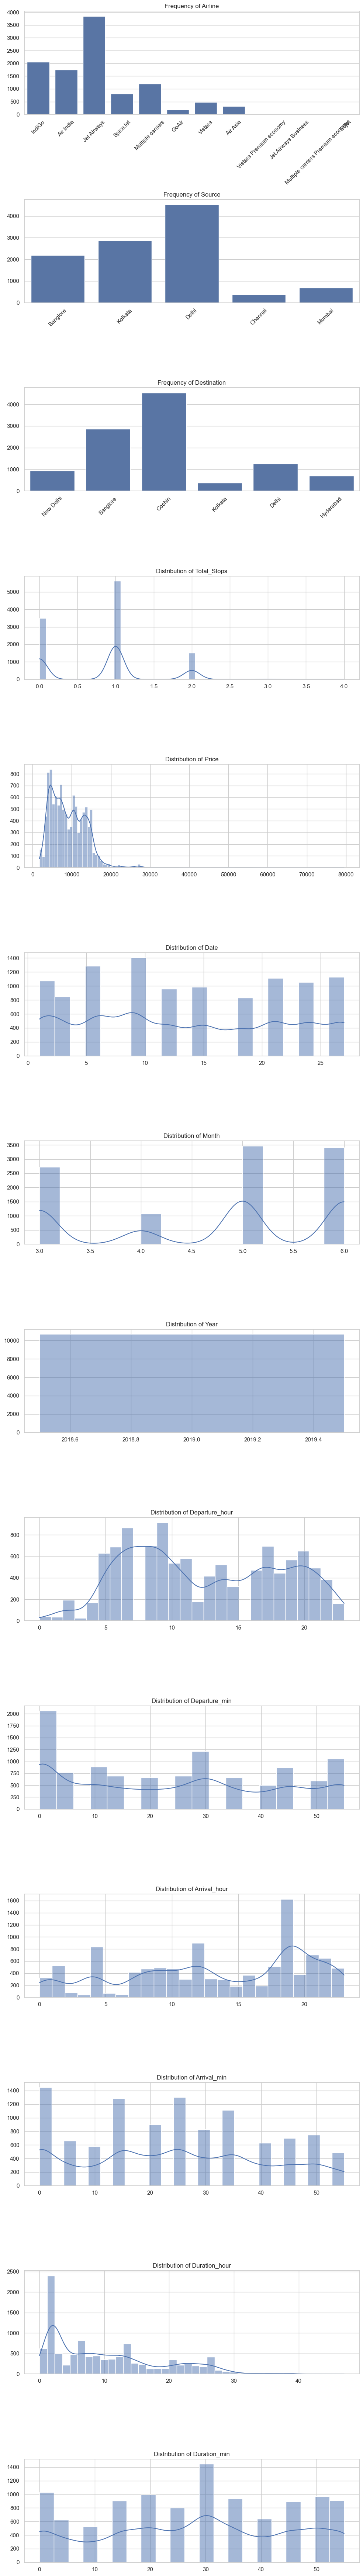

In [37]:
def plot_histograms(df, save_path=None):
    # Set the style of seaborn plots
    sns.set(style="whitegrid")

    num_cols = len(df.columns)
    
    # Create subplots with proper dimensions
    fig, axes = plt.subplots(num_cols, 1, figsize=(10, 5 * num_cols))
    
    # Handle the case where there is only one column to ensure axes is a list
    if num_cols == 1:
        axes = [axes]

    for i, column in enumerate(df.columns):
        ax = axes[i]
        
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Plot histogram for categorical features
            sns.countplot(x=df[column], ax=ax)
            ax.set_title(f'Frequency of {column}')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        else:
            # Plot histogram for continuous features
            sns.histplot(df[column], kde=True, ax=ax)
            ax.set_title(f'Distribution of {column}')
        
        ax.set_xlabel('')
        ax.set_ylabel('')

    plt.tight_layout()

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path)
    
    plt.show()

# Example usage with DataFrame `df` and saving to 'histograms.png'
plot_histograms(df, save_path='histograms.png')

Skewness of Price: 1.8122978678177029
Skewness of Duration_hour: 0.8507428875262609


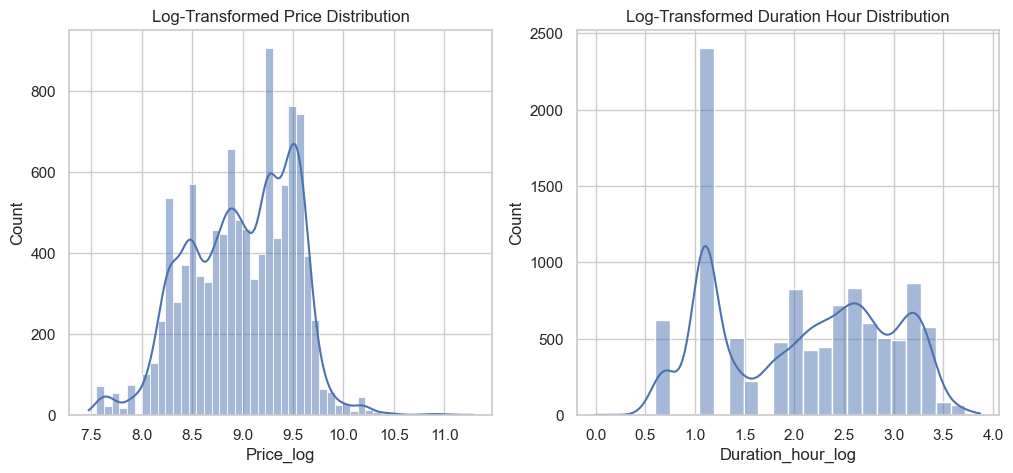

In [38]:
from scipy.stats import skew

# Check skewness
print(f"Skewness of Price: {skew(df['Price'])}")
print(f"Skewness of Duration_hour: {skew(df['Duration_hour'])}")

# Apply log transformation if necessary
df['Price_log'] = np.log1p(df['Price'])  # log1p is used to avoid log(0) issues
df['Duration_hour_log'] = np.log1p(df['Duration_hour'])

# Visualize the transformed data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Price_log'], kde=True)
plt.title('Log-Transformed Price Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Duration_hour_log'], kde=True)
plt.title('Log-Transformed Duration Hour Distribution')

plt.show()


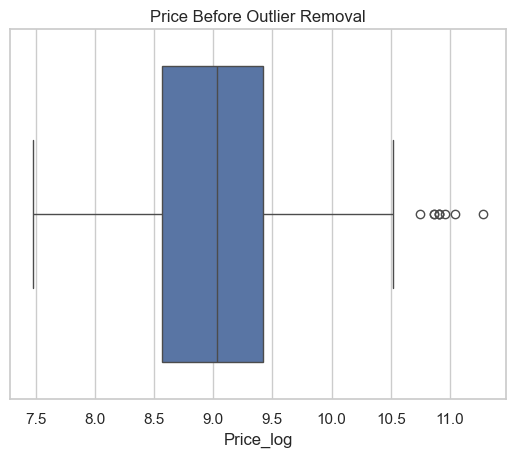

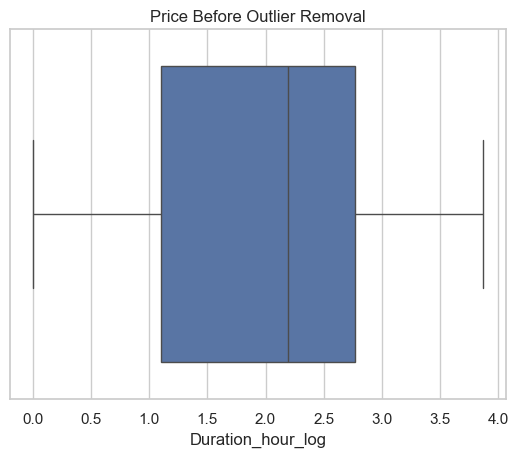

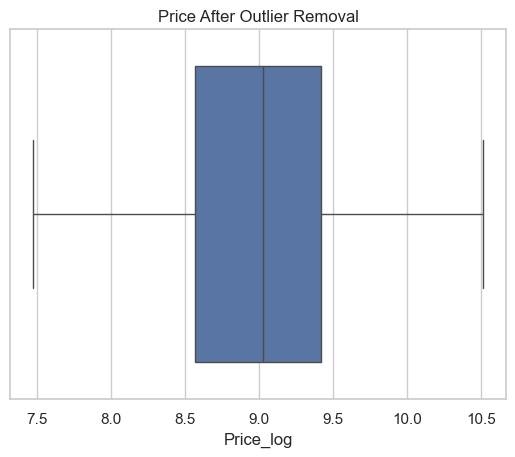

In [39]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Before removing outliers, visualize the data
sns.boxplot(x=df['Price_log'])
plt.title('Price Before Outlier Removal')
plt.show()

sns.boxplot(x=df['Duration_hour_log'])
plt.title('Price Before Outlier Removal')
plt.show()

# Remove outliers in 'Price', 'Duration_hour', and 'Days Left'
df_cleaned = remove_outliers(df, 'Price_log')
df_cleaned = remove_outliers(df_cleaned, 'Duration_hour_log')

# After removing outliers, visualize the data
sns.boxplot(x=df_cleaned['Price_log'])
plt.title('Price After Outlier Removal')
plt.show()

In [40]:
encoder = OneHotEncoder()

In [41]:
encoder.fit_transform(df_cleaned[['Airline','Source','Destination']]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [42]:
encoded_df=pd.DataFrame(encoder.fit_transform(df_cleaned[['Airline','Source','Destination']]).toarray(),columns=encoder.get_feature_names_out())
encoded_df

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10669,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10670,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10671,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [43]:
df = pd.concat([df_cleaned, encoded_df], axis=1)

In [44]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Departure_hour,Departure_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,3897.0,24.0,3.0,2019.0,22.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Air India,Kolkata,Banglore,2.0,7662.0,1.0,5.0,2019.0,5.0,50.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,2.0,13882.0,9.0,6.0,2019.0,9.0,25.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,1.0,6218.0,12.0,5.0,2019.0,18.0,5.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,1.0,13302.0,1.0,3.0,2019.0,16.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
df.drop(columns=['Airline','Source','Destination'], axis=1 , inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10683 entries, 0 to 10364
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                10674 non-null  float64
 1   Price                                      10674 non-null  float64
 2   Date                                       10674 non-null  float64
 3   Month                                      10674 non-null  float64
 4   Year                                       10674 non-null  float64
 5   Departure_hour                             10674 non-null  float64
 6   Departure_min                              10674 non-null  float64
 7   Arrival_hour                               10674 non-null  float64
 8   Arrival_min                                10674 non-null  float64
 9   Duration_hour                              10674 non-null  float64
 10  Duration_min               

In [47]:
df.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Departure_hour',
       'Departure_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_min', 'Price_log', 'Duration_hour_log', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

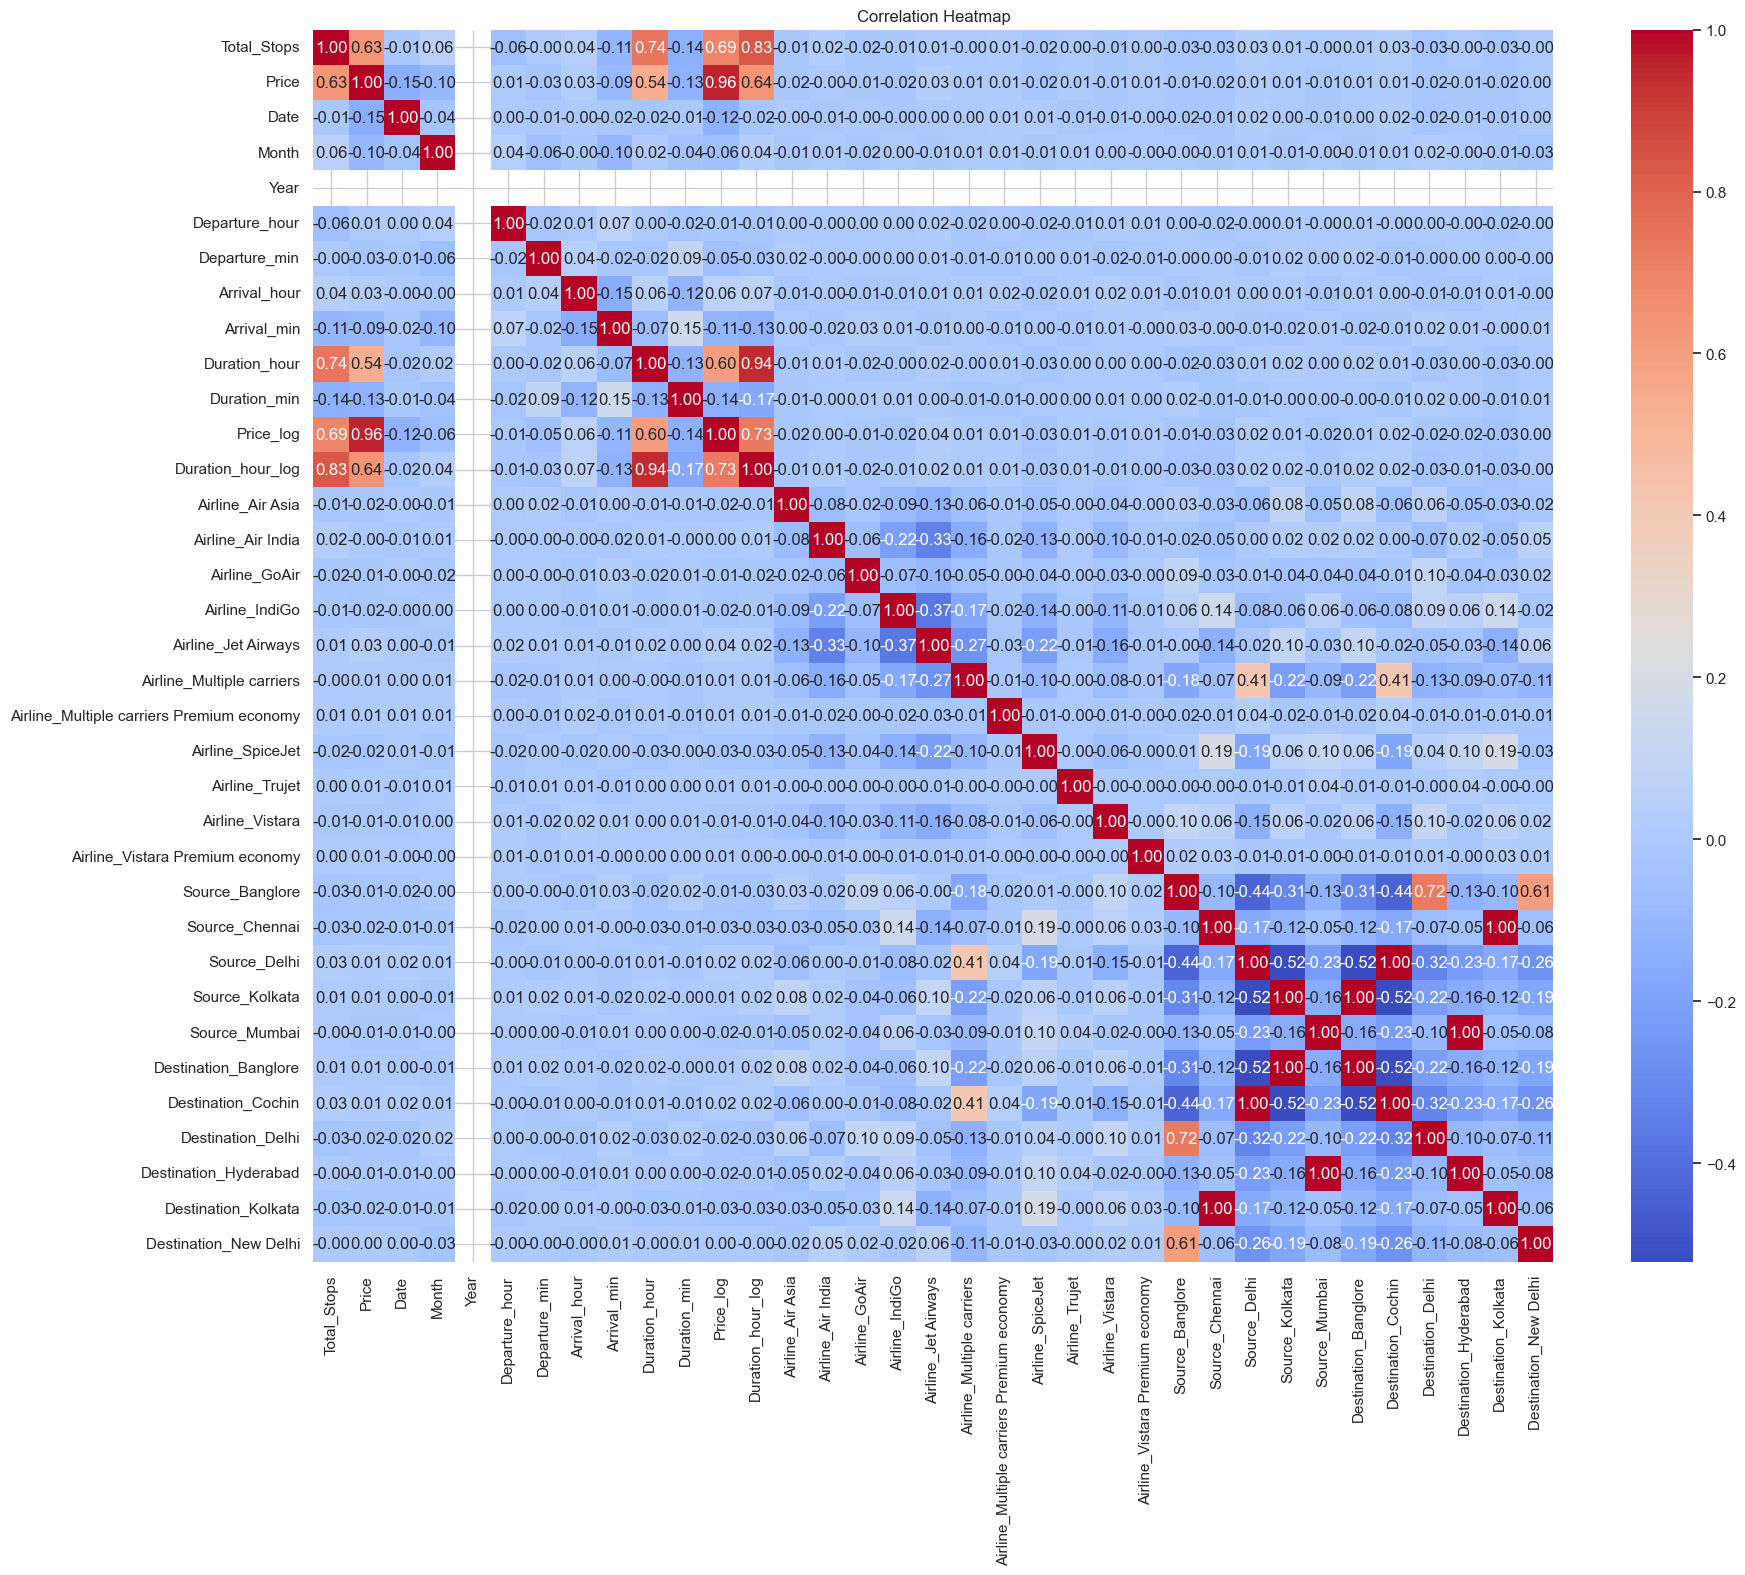

In [48]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [49]:
df['Price_log'].isnull().sum()

np.int64(9)

In [50]:
df = df.dropna(subset=['Price_log'])


In [51]:
x = df.drop(columns=['Price_log'])  # Features
y = df['Price_log']                 # Target

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42)

In [53]:
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [54]:
y_pred = model.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

MAE: 0.00017457649242625105
MSE: 1.2676766959220197e-06
R2 Score: 0.9999951548648948
